<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n20.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.776455,40.226952,34.720219,29.317357,-372.504165,-237.463182,105.171428,-342.634610
1,0.0,1.0,70.169782,68.137869,77.713304,45.551841,-294.907404,-23.334607,330.131539,-353.466146
2,0.0,2.0,65.482262,43.567037,62.144234,25.315202,-91.117637,115.391097,263.725198,-148.334101
3,0.0,3.0,41.206522,95.869191,77.660575,24.339250,-136.656973,112.418564,328.967848,-216.549283
4,0.0,4.0,70.031890,36.445494,48.750481,82.008294,166.653090,413.889250,212.749544,201.139706
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.976467,94.155596,66.933698,24.877092,-156.658343,110.284510,627.770493,-517.485983
249996,999.0,246.0,62.326640,22.513841,51.930267,31.881258,150.070884,328.722890,148.248752,180.474138
249997,999.0,247.0,39.944178,55.249815,41.361395,54.415196,-445.317426,-244.346842,300.893527,-545.240369
249998,999.0,248.0,23.000951,96.272921,68.202808,89.984361,-1601.177815,-1313.716774,400.562098,-1714.278872


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.776455,40.226952,34.720219,29.317357,-372.504165,-237.463182,105.171428,-342.634610
1,0.0,1.0,70.169782,68.137869,77.713304,45.551841,-294.907404,-23.334607,330.131539,-353.466146
2,0.0,2.0,65.482262,43.567037,62.144234,25.315202,-91.117637,115.391097,263.725198,-148.334101
3,0.0,3.0,41.206522,95.869191,77.660575,24.339250,-136.656973,112.418564,328.967848,-216.549283
4,0.0,4.0,70.031890,36.445494,48.750481,82.008294,166.653090,413.889250,212.749544,201.139706
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.976467,94.155596,66.933698,24.877092,-156.658343,110.284510,627.770493,-517.485983
249996,999.0,246.0,62.326640,22.513841,51.930267,31.881258,150.070884,328.722890,148.248752,180.474138
249997,999.0,247.0,39.944178,55.249815,41.361395,54.415196,-445.317426,-244.346842,300.893527,-545.240369
249998,999.0,248.0,23.000951,96.272921,68.202808,89.984361,-1601.177815,-1313.716774,400.562098,-1714.278872


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    20.776455  40.226952  34.720219  29.317357  -372.504165   
      1.0    70.169782  68.137869  77.713304  45.551841  -294.907404   
      2.0    65.482262  43.567037  62.144234  25.315202   -91.117637   
      3.0    41.206522  95.869191  77.660575  24.339250  -136.656973   
      4.0    70.031890  36.445494  48.750481  82.008294   166.653090   
...                ...        ...        ...        ...          ...   
999.0 245.0  70.976467  94.155596  66.933698  24.877092  -156.658343   
      246.0  62.326640  22.513841  51.930267  31.881258   150.070884   
      247.0  39.944178  55.249815  41.361395  54.415196  -445.317426   
      248.0  23.000951  96.272921  68.202808  89.984361 -1601.177815   
      249.0  38.682388  38.255445  83.418053  20.449620   123.341394   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -237.463182  105.171428  -342.634610  
      1.0     -23.334607  330.131539  -353.466146  
      2.0     115.391097  263.725198  -148.334101  
      3.0     112.418564  328.967848  -216.549283  
      4.0     413.889250  212.749544   201.139706  
...                  ...         ...          ...  
999.0 245.0   110.284510  627.770493  -517.485983  
      246.0   328.722890  148.248752   180.474138  
      247.0  -244.346842  300.893527  -545.240369  
      248.0 -1313.716774  400.562098 -1714.278872  
      249.0   314.146901  101.676344   212.470557  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    20.776455  40.226952  34.720219  29.317357  -372.504165   
      1.0    70.169782  68.137869  77.713304  45.551841  -294.907404   
      2.0    65.482262  43.567037  62.144234  25.315202   -91.117637   
      3.0    41.206522  95.869191  77.660575  24.339250  -136.656973   
      4.0    70.031890  36.445494  48.750481  82.008294   166.653090   
...                ...        ...        ...        ...          ...   
999.0 245.0  70.976467  94.155596  66.933698  24.877092  -156.658343   
      246.0  62.326640  22.513841  51.930267  31.881258   150.070884   
      247.0  39.944178  55.249815  41.361395  54.415196  -445.317426   
      248.0  23.000951  96.272921  68.202808  89.984361 -1601.177815   
      249.0  38.682388  38.255445  83.418053  20.449620   123.341394   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -237.463182  105.171428  -342.634610  
      1.0     -23.334607  330.131539  -353.466146  
      2.0     115.391097  263.725198  -148.334101  
      3.0     112.418564  328.967848  -216.549283  
      4.0     413.889250  212.749544   201.139706  
...                  ...         ...          ...  
999.0 245.0   110.284510  627.770493  -517.485983  
      246.0   328.722890  148.248752   180.474138  
      247.0  -244.346842  300.893527  -545.240369  
      248.0 -1313.716774  400.562098 -1714.278872  
      249.0   314.146901  101.676344   212.470557  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.776455,40.226952,34.720219,29.317357,-372.504165,-237.463182,105.171428,-342.634610
1,0.0,1.0,70.169782,68.137869,77.713304,45.551841,-294.907404,-23.334607,330.131539,-353.466146
2,0.0,2.0,65.482262,43.567037,62.144234,25.315202,-91.117637,115.391097,263.725198,-148.334101
3,0.0,3.0,41.206522,95.869191,77.660575,24.339250,-136.656973,112.418564,328.967848,-216.549283
4,0.0,4.0,70.031890,36.445494,48.750481,82.008294,166.653090,413.889250,212.749544,201.139706
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.976467,94.155596,66.933698,24.877092,-156.658343,110.284510,627.770493,-517.485983
249996,999.0,246.0,62.326640,22.513841,51.930267,31.881258,150.070884,328.722890,148.248752,180.474138
249997,999.0,247.0,39.944178,55.249815,41.361395,54.415196,-445.317426,-244.346842,300.893527,-545.240369
249998,999.0,248.0,23.000951,96.272921,68.202808,89.984361,-1601.177815,-1313.716774,400.562098,-1714.278872


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    20.776455  40.226952  34.720219  29.317357  -372.504165   
      1.0    70.169782  68.137869  77.713304  45.551841  -294.907404   
      2.0    65.482262  43.567037  62.144234  25.315202   -91.117637   
      3.0    41.206522  95.869191  77.660575  24.339250  -136.656973   
      4.0    70.031890  36.445494  48.750481  82.008294   166.653090   
...                ...        ...        ...        ...          ...   
999.0 245.0  70.976467  94.155596  66.933698  24.877092  -156.658343   
      246.0  62.326640  22.513841  51.930267  31.881258   150.070884   
      247.0  39.944178  55.249815  41.361395  54.415196  -445.317426   
      248.0  23.000951  96.272921  68.202808  89.984361 -1601.177815   
      249.0  38.682388  38.255445  83.418053  20.449620   123.341394   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -237.463182  105.171428  -342.634610  
      1.0     -23.334607  330.131539  -353.466146  
      2.0     115.391097  263.725198  -148.334101  
      3.0     112.418564  328.967848  -216.549283  
      4.0     413.889250  212.749544   201.139706  
...                  ...         ...          ...  
999.0 245.0   110.284510  627.770493  -517.485983  
      246.0   328.722890  148.248752   180.474138  
      247.0  -244.346842  300.893527  -545.240369  
      248.0 -1313.716774  400.562098 -1714.278872  
      249.0   314.146901  101.676344   212.470557  

[250000 rows x 8 columns]

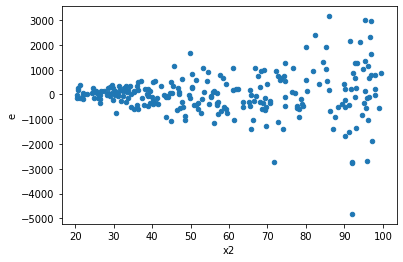

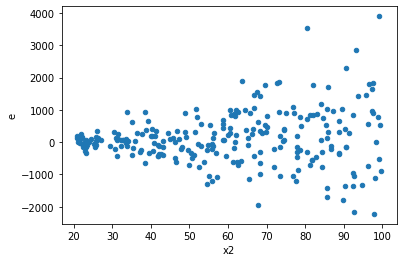

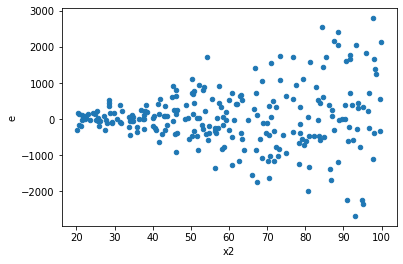

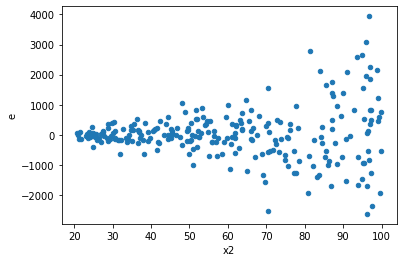

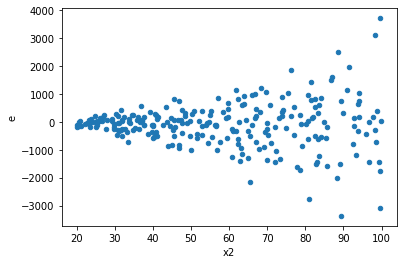

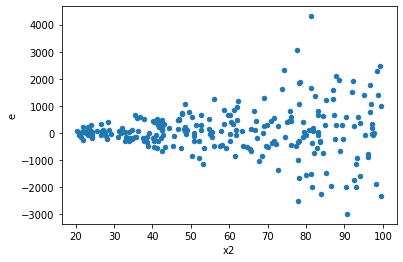

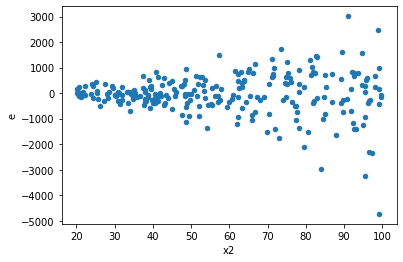

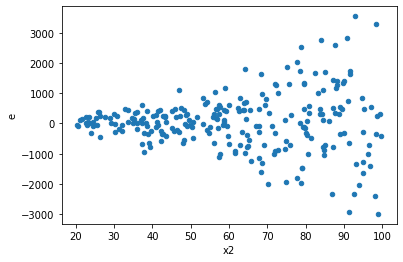

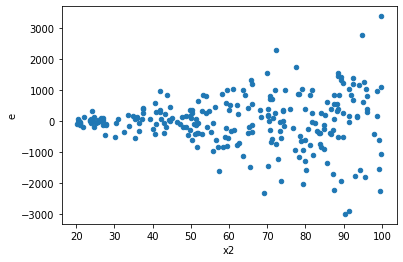

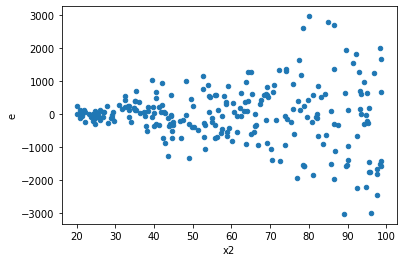

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,39886269.270773634,116402245.38758081,415481.9715705587,1212523.3894539669,2.918353797327285,3.12112847344892e-07,0.9999998439435763,1.56056423672446e-07,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,26549914.02613408,94291614.76706904,276561.6044388967,982204.3204903025,3.551484749602362,1.9395498540575318e-09,0.9999999990302251,9.697749270287659e-10,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,14360566.893443452,125358042.21563764,149589.2384733693,1305812.9397462255,8.7293240681795,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,11757496.322597738,148710713.61918104,122473.92002705978,1549069.9335331358,12.648161610168755,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,96.0,96.0,48342114.8433972,78620432.87880336,503563.6962853875,818962.842487535,1.6263341629445016,0.018040224961271,0.9909798875193645,0.0090201124806355,Reject001=1 : Homoscedasticity
5.0,96.0,96.0,53676384.1708618,98892844.18561509,559129.0017798104,1030133.7936001573,1.8423902003313224,0.0030454644207700277,0.998477267789615,0.0015227322103850138,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,68065976.50675946,112505401.81714448,709020.5886120778,1171931.2689285884,1.6528875010846549,0.014575976656133971,0.992712011671933,0.0072879883280669855,Reject001=1 : Homoscedasticity
8.0,96.0,96.0,61372860.55869422,75088848.80179676,639300.6308197315,782175.5083520496,1.2234862139102216,0.32474972568141025,0.8376251371592949,0.16237486284070513,Reject001=1 : Homoscedasticity
11.0,96.0,96.0,52425090.490370914,79489701.027601,546094.6926080304,828017.7190375105,1.516253005651962,0.042702626150798784,0.9786486869246006,0.021351313075399392,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,39886269.270773634,116402245.38758081,415481.9715705587,1212523.3894539669,2.918353797327285,3.12112847344892e-07,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,26549914.02613408,94291614.76706904,276561.6044388967,982204.3204903025,3.551484749602362,1.9395498540575318e-09,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,14360566.893443452,125358042.21563764,149589.2384733693,1305812.9397462255,8.7293240681795,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,11757496.322597738,148710713.61918104,122473.92002705978,1549069.9335331358,12.648161610168755,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,96.0,96.0,48342114.8433972,78620432.87880336,503563.6962853875,818962.842487535,1.6263341629445016,0.018040224961271,Reject001=1 : Homoscedasticity
5.0,96.0,96.0,53676384.1708618,98892844.18561509,559129.0017798104,1030133.7936001573,1.8423902003313224,0.0030454644207700277,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,65128433.17348667,50531284.53124163,678421.1788904861,526367.5472004337,0.7758713371261104,0.2155972305853194,Reject001=1 : Homoscedasticity
7.0,96.0,96.0,68065976.50675946,112505401.81714448,709020.5886120778,1171931.2689285884,1.6528875010846549,0.014575976656133971,Reject001=1 : Homoscedasticity
8.0,96.0,96.0,61372860.55869422,75088848.80179676,639300.6308197315,782175.5083520496,1.2234862139102216,0.32474972568141025,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    639
Reject001=1 : Homoscedasticity      361
Name: Result_test, dtype: int64